<a href="https://colab.research.google.com/github/eliasfeitoza/Curso-Data-Science-na-Pratica/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>



#Análise dos Dados do Airbnb - Los Angeles



* O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

* Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

* No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

* Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

<b><center>Neste *notebook*, iremos analisar os dados referentes à cidade de Los Angeles, e ver quais insights podem ser extraídos a partir de dados brutos.</b></center>

<center><img src="https://bit.ly/325z87D" height="200px"></center>

#<center>Los Angeles City</center><hr></hr>

* Los Angeles é uma grande cidade do sul da Califórnia e também o centro da indústria de cinema e televisão do país. Perto do famoso letreiro de Hollywood, é possível conhecer os bastidores das produções nos estúdios Paramount Pictures, Universal e Warner Brothers. Na Hollywood Boulevard, o TCL Chinese Theatre exibe impressões de mãos e pés de celebridades na Calçada da Fama, uma homenagem a milhares de astros, e se pode comprar mapas das casas dos artistas.

## Obtenção dos Dados


<h6> * Todos os dados utilizados neste projeto foram retirados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html)</h6>

* Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

1. `listings.csv` - *Summary information and metrics for listings in Los Angeles (good for visualisations).*
1. `listings.csv` - Informações resumidas e métricas para listagens em Los Angeles (bom para visualizações)

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://bit.ly/2UGgeCi")

## Análise dos Dados


* Esta etapa tem como objetivo facilitar o entendimento dos campos inseridos no <b>DataSet (Tabela)</b> bem como facilitar a localização de algum dado específico!!


**Dicionário das variáveis**

* `id` - <i>número de id gerado para identificar o imóvel</i>
* `name` -<i> nome da propriedade anunciada</i>
* `host_id` <i>- número de id do proprietário (anfitrião) da propriedade</i>
* `host_name` <i>- nome do anfitrião</i>
* `neighbourhood_group`<i> - esta coluna não contém nenhum valor válido</i>
* `neighbourhood` <i>- nome do bairro</i>
* `latitude` <i>- coordenada da latitude da propriedade</i>
* `longitude`<i> - coordenada da longitude da propriedade</i>
* `room_type` <i>- informa o tipo de quarto que é oferecido</i>
* `price` <i>- preço para alugar o imóvel,</i>
* `minimum_nights`<i> - quantidade mínima de noites para reservar</i>
* `number_of_reviews` <i>- número de reviews que a propriedade possui</i>
* `last_review` <i>- data do último review</i>
* `reviews_per_month` <i>- quantidade de reviews por mês</i>
* `calculated_host_listings_count`<i> - quantidade de imóveis do mesmo anfitrião</i>
* `availability_365`<i> - número de dias de disponibilidade dentro de 365 dias</i>


<b>Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.</b>

In [3]:
# mostrar as 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,248
1,344,Family perfect;Pool;Near Studios!,767,Melissa,Other Cities,Burbank,34.16562,-118.33458,Entire home/apt,168,2,8,2019-10-19,0.19,1,62
2,2708,Mirrored Mini-Suite with Fireplace - W. Hollywood,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,79,30,22,2019-08-31,0.33,2,252
3,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,140,1,20,2019-10-03,0.19,2,344
4,2864,*Upscale Professional Home with Beautiful Studio*,3207,Bernadine,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,80,2,0,NaN,NaN,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

* Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

* Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [4]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Variáveis:	 40125
Entradas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

* A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

1. É possível ver que a coluna `reviews_per_month` possui <b>20,30%</b> dos seus valores faltantes. 

2. As variáveis `last reviews` e possui <b>20,30%</b> dos seus valores faltantes.

3. As variáveis `host_name` tem <b>1,08%</b> dos valores nulos faltantes.

<b><center>Com os numeros apresentados a nós, podemos concluir que os dados considerados nulos não impcatara em nossa análise.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

n = (df.isnull().sum() / df.shape[0]).sort_values(ascending = False)
df_n = pd.DataFrame(n)
df_n.style.format("{:.2%}")




,0
reviews_per_month,20.30%
last_review,20.30%
host_name,1.08%
name,0.00%
availability_365,0.00%
calculated_host_listings_count,0.00%
number_of_reviews,0.00%
minimum_nights,0.00%
price,0.00%
room_type,0.00%


### **Q3. Qual o tipo de distribuição das variáveis?** 

* Para identificar a distribuição das variáveis, irei plotar o histograma.

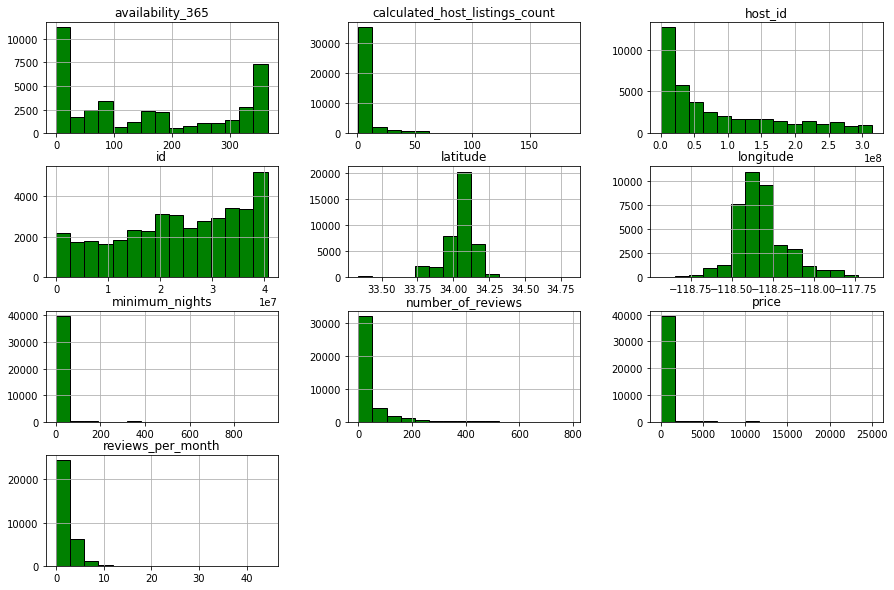

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15,color='green',edgecolor='black', figsize = (15,10));

### **Q4. Qual a média dos preços de aluguel?**

* Para uma melhor decisão no momento de pesquisa, abaixo demonstramos a <b>média de valores</b> de aluguéis oferecidos para a cidade de <b>Los Angeles.</b>

In [23]:
# ver a média da coluna `price``

df["price"].mean()

225.84067289719627

* Ficando assim estimado a média de <b>$ 225,84 ( Moeda Local )</b>, para os visitantes á cidade de Los Angeles.

###**Q5. Há OutLiers presente?**

* Os outliers são dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

* Entender os outliers é fundamental em uma análise de dados por pelo menos dois aspectos:

* Os outliers podem viesar negativamente todo o resultado de uma análise;

* O comportamento dos outliers pode ser justamente o que está sendo procurado.
Os outliers possuem diversos outros nomes, como: dados discrepantes, pontos fora da curva, observações fora do comum, anomalias, valores atípicos, entre outros.

fonte: Aquarela Inovação do Brasil S.A.

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,40125.000000,40125.000000,40125.000000,31980.000000,40125.000000,40125.000000
mean,225.840673,10.867688,34.082069,1.870650,7.659539,158.237458
std,656.723597,20.848665,61.568212,1.971808,19.448746,139.786661
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,70.000000,1.000000,1.000000,0.360000,1.000000,7.000000
50%,110.000000,2.000000,8.000000,1.150000,2.000000,133.000000
75%,189.000000,30.000000,39.000000,2.820000,5.000000,317.000000
max,25000.000000,950.000000,788.000000,44.380000,185.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de <b>189,00 dólares</b>  porém seu valor máximo é  <b>$ 25.000,00 dólares.</b>

* A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.



*<b>Definção do termo BoxPlot:</b> Em estatística descritiva, diagrama de caixa, diagrama de extremos e quartis, boxplot ou box plot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis
<hr>



#### Boxplot para minimum_nights : 

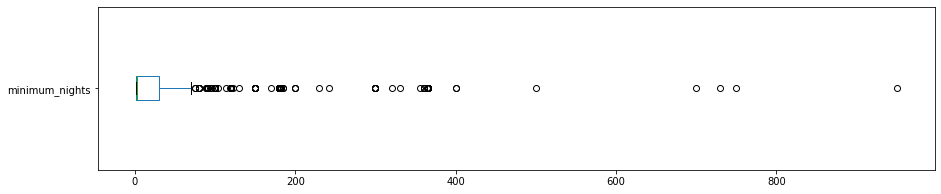


minimum_nights: valores acima de 30:
2708 entradas
6.75%


In [21]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("\nminimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.2f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price : 

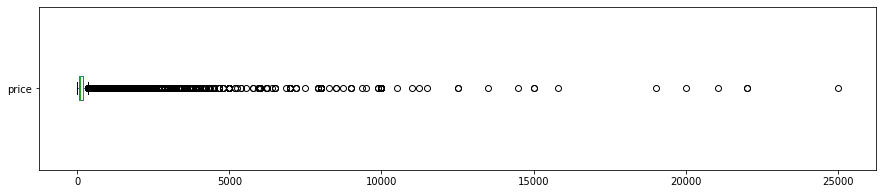


price: valores acima de 660
1838 entradas
4.58%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 660 para price
print("\nprice: valores acima de 660")
print("{} entradas".format(len(df[df.price > 660])))
print("{:.2f}%".format((len(df[df.price > 660]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Boxplot para number of reviews : 

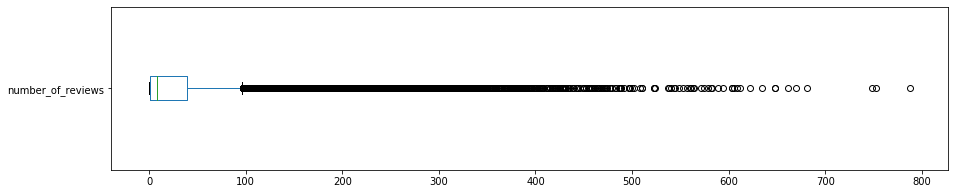

number_of_reviews: valores acima de 62
6874 entradas
17.13%


In [11]:
# number of reviews
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 62 para number of reviews
print("number_of_reviews: valores acima de 62")
print("{} entradas".format(len(df[df.number_of_reviews > 62])))
print("{:.2f}%".format((len(df[df.number_of_reviews > 62]) / df.shape[0])*100))

# df.number_of_reviews.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Boxplot para reviews per month : 

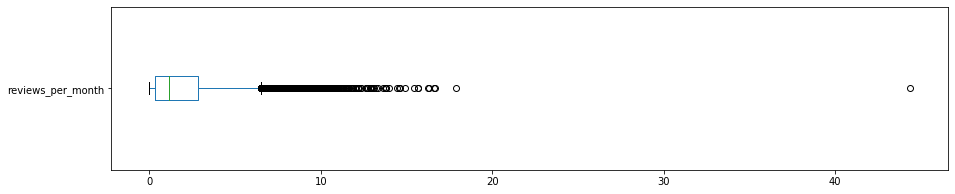

reviews per month: valores acima de 2
11219 entradas
27.96%


In [12]:
# reviews per month
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 2 para reviews per month
print("reviews per month: valores acima de 2")
print("{} entradas".format(len(df[df.reviews_per_month > 2])))
print("{:.2f}%".format((len(df[df.reviews_per_month > 2]) / df.shape[0])*100))

# df.reviews_per_month.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

* Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

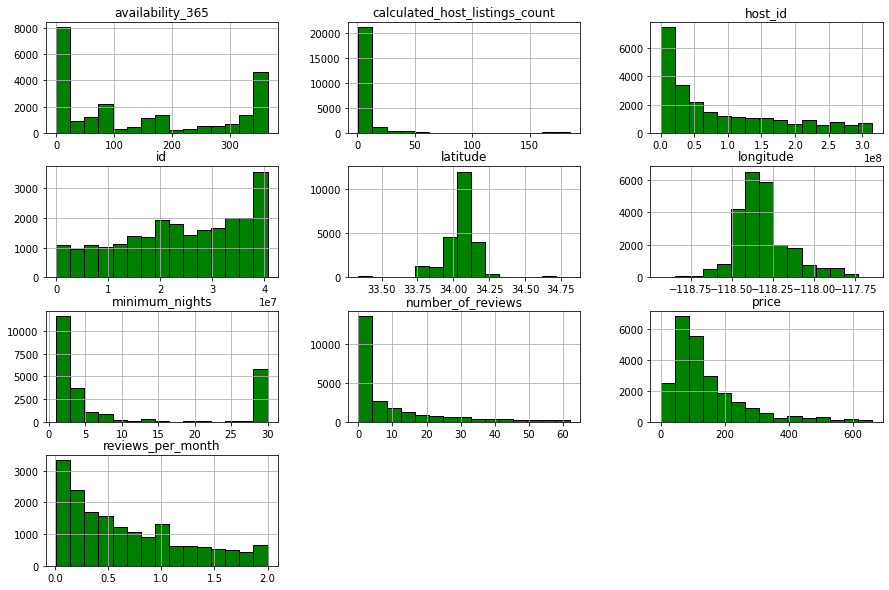

In [13]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 660].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 62].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 2].index, axis=0, inplace=True)
# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15,color='green',edgecolor='black', figsize=(15,10));

### **Q6. Qual a correlação existente entre as variáveis**

* Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

* Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [14]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)




,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.028916,-0.027567,-0.012953,0.074578,0.089677
minimum_nights,-0.028916,1.000000,-0.036553,-0.152831,0.208689,0.075140
number_of_reviews,-0.027567,-0.036553,1.000000,0.463670,-0.098888,0.077805
reviews_per_month,-0.012953,-0.152831,0.463670,1.000000,-0.017206,0.082578
calculated_host_listings_count,0.074578,0.208689,-0.098888,-0.017206,1.000000,0.174181
availability_365,0.089677,0.075140,0.077805,0.082578,0.174181,1.000000


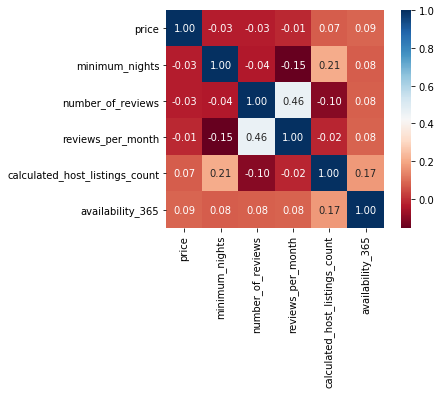

In [15]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb na cidade de Los Angeles?**
* A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

* Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.*italicized text*

In [16]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    13424
Private room        9156
Shared room         1196
Hotel room           237
Name: room_type, dtype: int64

In [17]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.559031
Private room       0.381293
Shared room        0.049806
Hotel room         0.009870
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

* Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

In [18]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Unincorporated Catalina Island           571.500000
Avalon                                   433.154930
Malibu                                   353.262712
Tujunga Canyons                          312.500000
Universal City                           309.000000
Beverly Crest                            295.660714
Unincorporated Santa Monica Mountains    290.611111
Bel-Air                                  286.464286
Pacific Palisades                        276.827957
Century City                             267.272727
Name: price, dtype: float64

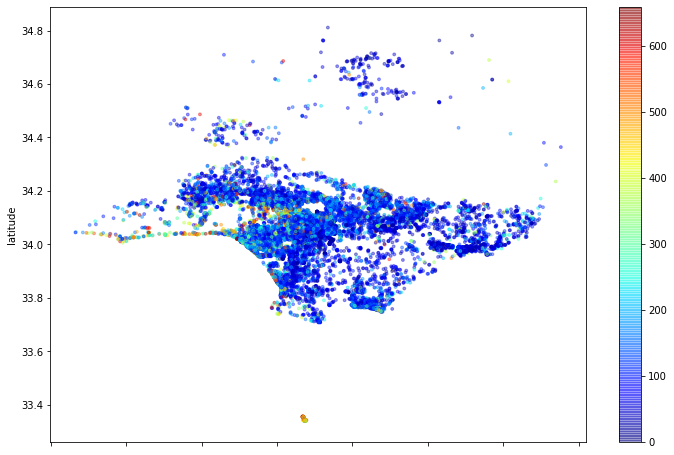

In [19]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [20]:
# ver a média da coluna `minimum_nights``

df["minimum_nights"].mean()

10.86768847352025

* Ficando assim estimado a média de <b>$ 10,86 ( Moeda Local )</b>, por noite durante a sua estádia na cidade.

##<center> Conclusões


##<center>Por que de Los Angeles??

* Quando as pessoas falam sobre “ter tudo que se precisa”, Los Angeles é a cidade que elas tem em mente. A cidade é muito cool, cheia de arranha céus, trilhas intensas e algumas das mais maravilhosas praias de areia branca do mundo. LA é uma cidade realmente moderna  mas que ao mesmo tempo conseguiu manter espaços naturais lindos. Escale uma montanha, nade em água quente e depois vá num restaurante de sushi da moda que todo mundo está obcecado.

* Los Angeles é conhecida como a cidade dos ricos e famosos, mas você vai ficar surpreso em saber que ela também é perfeita para viajantes que querem economizar – com muitas coisas incríveis para fazer de graça na cidade, e lugares baratos para comer que se adaptam a todos os orçamentos(confia na gente, é delicioso!)

* Você não precisa mais escolher entre uma praia relaxante, um lugar lindo para escalar uma montanha ou uma cidade cheia de coisas pra fazer… Em LA você pode ter tudo isso!



